In [18]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
%matplotlib inline

In [2]:
flu_train = pd.read_csv("/Users/zoetsai/Downloads/FluTrain.csv")

In [9]:
flu_train.columns

Index(['Week', 'ILI', 'Queries'], dtype='object')

In [16]:
flu_train.describe()

,ILI,Queries
count,417.000000,417.000000
mean,1.676861,0.286028
std,1.126163,0.157697
min,0.534093,0.041169
25%,0.902459,0.156707
50%,1.252563,0.281541
75%,2.058690,0.378486
max,7.618892,1.000000


In [14]:
flu_train[flu_train['ILI'] == flu_train['ILI'].max()]

,Week,ILI,Queries
302,2009-10-18 - 2009-10-24,7.618892,1


In [15]:
flu_train[flu_train['Queries'] == flu_train['Queries'].max()]

,Week,ILI,Queries
302,2009-10-18 - 2009-10-24,7.618892,1


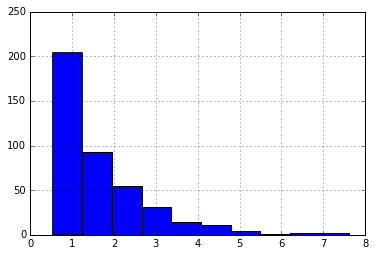

In [19]:
flu_train['ILI'].hist()

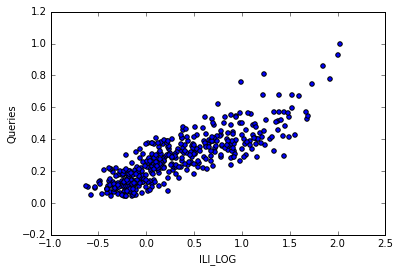

In [26]:
flu_train['ILI_LOG'] = flu_train['ILI'].apply(np.log)
flu_train.plot.scatter('ILI_LOG', 'Queries')

In [27]:
model = sm.ols(formula="ILI_LOG ~ Queries", data=flu_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ILI_LOG   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     1011.
Date:                Sun, 01 May 2016   Prob (F-statistic):          2.62e-113
Time:                        02:23:30   Log-Likelihood:                -87.974
No. Observations:                 417   AIC:                             179.9
Df Residuals:                     415   BIC:                             188.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.4993      0.030    -16.422      0.000        -0.559    -0.440
Queries        2.9613      0.093     31.800      0.000         2.778     3.144
==============================================================================
Omnibus:                        9.797   Durbin-Watson:                   0.283
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.884
Skew:                           0.373   Prob(JB):                      0.00714
Kurtosis:                       3.112   Cond. No.                         6.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""